#### **Problem & Target**

#### features description
|column|description|
|---|---|
|Working_Year|The year the salary was paid ( 2020, 2021, 2022 )|
|Designation|The role worked in during the year|
|Experience|The experience level in the job during the year. [ EN - Entry level / Junior, MI - Mid level / Intermediate, SE - Senior level / Expert, EX - Executive level / Director ]|
|Employment_Status|The type of employment for the role. [ PT - Part time, FT - Full time, CT - Contract, FL - Freelance ]|
|Employee_Location|Employee's primary country of residence in during the work year as an ISO 3166 country code.( PFB Link to ISO 3166 country code )|
|Company_Location|The country of the employer's main office or contracting branch.|
|Company_Size|The median number of people that worked for the company during the year. [ S(small) - Less than 50 employees , M(medium) - 50 to 250 employees , L(large) - More than 250 employees ]|
|Remote_Working_Ratio|The overall amount of work done remotely. [ 0 - No Remote Work (less than 20%), 50 - Partially Remote, 100 - Fully Remote (more than 80%) ]|
|Salary In Rupees|The total gross salary amount paid.|

#### **Dataset**

In [1]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from my_template import tot_exec_time, added_section_separate_line, visualize_box_whisker_plot, visualize_subplots_by_diff_df

In [2]:
## load dataset
df = pd.read_csv('./dataset/Data_Science_Fields_Salary_Categorization.csv', index_col=0)

In [3]:
# data preprocessing
df['Salary_In_Rupees'] = df['Salary_In_Rupees'].str.replace(',','').astype(float)   # remove dollar separator, and change type to float
df['Remote_Working_Ratio'] = pd.to_numeric(df['Remote_Working_Ratio'], downcast='float')
df['Salary_In_TWD'] = df['Salary_In_Rupees']*0.39   # 新增salary匯率為TWD

In [4]:
print(df.shape)
df.head()

(607, 10)


,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_In_TWD
1,2020,Data Scientist,MI,FT,6352272.0,DE,DE,L,0.0,2477386.08
2,2020,Machine Learning Scientist,SE,FT,20688070.0,JP,JP,S,0.0,8068347.30
3,2020,Big Data Engineer,SE,FT,8674985.0,GB,GB,M,50.0,3383244.15
4,2020,Product Data Analyst,MI,FT,1591390.0,HN,HN,S,0.0,620642.10
5,2020,Machine Learning Engineer,SE,FT,11935425.0,US,US,L,50.0,4654815.75


#### **Visualization**

### Phase 1. Choose the most common 5 positions and analyze them

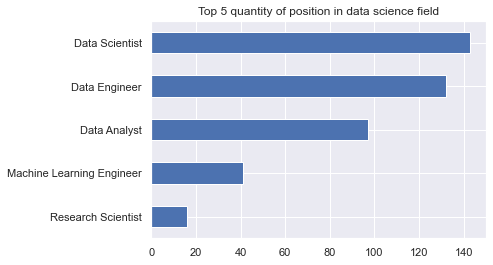

In [117]:
# top 5 quantity of position
sns.set_theme(style="darkgrid")
df['Designation'].value_counts().sort_values(ascending=False)[:5].sort_values().plot(kind='barh')
plt.title('Top 5 quantity of position in data science field')
plt.show()

* 小結：取此dataset前5多數量的position，由於總共50個position中多達11個position只有1筆資料，32個position不足5筆資料，可推估部分position名稱較為特殊，由於無法一一深度探討這些position實際工作內容，故暫時不分析。直接取Top 5數量多的position進行EDA分析，可以發現這5個position職稱較為常見，應是大多數公司所開出的資料科學相關職稱

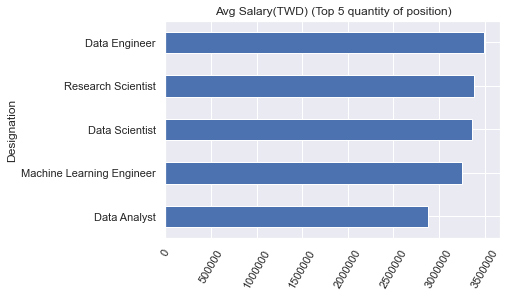

In [171]:
# top 5 quantity of position + average salary
sns.set_theme(style="darkgrid")
chose_position = df['Designation'].value_counts().sort_values(ascending=False)[:5].sort_values(ascending=False).index.tolist()   # 取此5個position名稱
df_chose = df[df['Designation'].isin(chose_position)].reset_index(drop=True)
ax = df_chose.groupby(['Designation'])['Salary_In_TWD'].mean().sort_values().plot(kind='barh')
plt.title('Avg Salary(TWD) (Top 5 quantity of position)')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation = 60)
plt.show()

* 小結：前5多數量的position在這三年平均salary約在300M~350M，其中Data Engineer為最高，Data Analyst較低

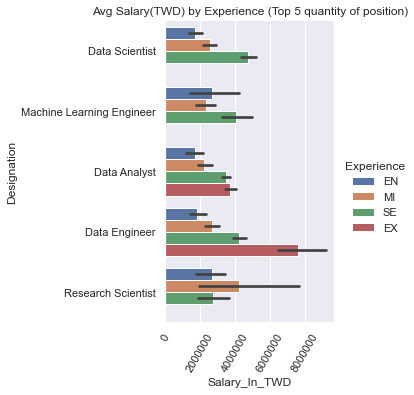

In [170]:
# Top 5 quantity of position + experience + average salary
sns.set_theme(style="darkgrid")
chose_position = df['Designation'].value_counts().sort_values(ascending=False)[:5].sort_values(ascending=False).index.tolist()
df_chose = df[df['Designation'].isin(chose_position)].reset_index(drop=True)
p = sns.catplot(x='Salary_In_TWD', y='Designation', kind='bar', hue='Experience', hue_order=['EN','MI','SE','EX'], data=df_chose)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))   # change scientific notation(eg.1e5) to plain(eg.100000)
plt.xticks(rotation = 60)
plt.title('Avg Salary(TWD) by Experience (Top 5 quantity of position)')
plt.show()

* 小結：將此5個position針對其經驗分成EN(entry-level)、MI(mid-level)、SE(senior-level)、EX(executive-level)，比較其平均薪資：
    * Data Engineer: 雖然其總平均薪資為最高，但在entry-level與mid-level與其他position差異並不大，需在senior-level以上其價值超越其他四個position
    * Research Scientist: 不同經驗間無明顯趨勢，但考慮其資料量不大(共16筆，小於一般做量化分析最小樣本30筆)，僅作為參考
    * Data Scientist: 平均薪資在不同經驗有落差，entry-level的菜鳥與senior-level落差可達到2倍之多，senior-level平均薪資可達到400M以上
    * Machine Learning Engineer: entry-level與mid-level平均薪資約落在200M~300M間，senior-level平均薪資則可達到400M
    * Data Analyst: entry-level與mid-level平均薪資約落在200M上下，達到senior-level以上則約落在300M~400M之間

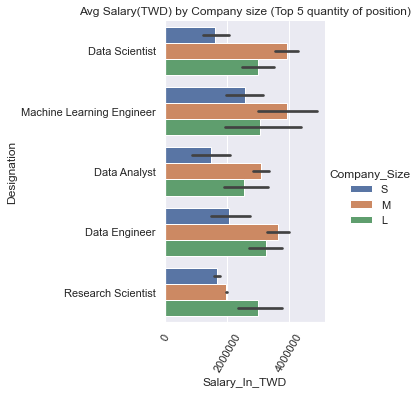

In [173]:
# Top 5 quantity of position + Company_Size + average salary
sns.set_theme(style="darkgrid")
chose_position = df['Designation'].value_counts().sort_values(ascending=False)[:5].sort_values(ascending=False).index.tolist()
df_chose = df[df['Designation'].isin(chose_position)].reset_index(drop=True)
df_chose = df_chose[df_chose['Salary_In_TWD']<10000000].reset_index(drop=True)   # Research Scientist最高薪資超過其他筆近2倍以上，
p = sns.catplot(x='Salary_In_TWD', y='Designation', kind='bar', hue='Company_Size', hue_order=['S','M','L'], data=df_chose)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))   # change scientific notation(eg.1e5) to plain(eg.100000)
plt.xticks(rotation = 60)
plt.title('Avg Salary(TWD) by Company size (Top 5 quantity of position)')
plt.show()

* 小結：
    * 因position中的Research Scientist最高一筆薪資高於其他筆薪資至少2倍以上，暫當作特例並移除後再進行分析
    * 比較此5個position在不同大小公司的平均薪資(此dataset的Company_Size數量比為(S:M:L=49:261:119))，平均薪資以中型公司(50<員工人數<250)為最高，大型公司(員工人數>250)平均薪資次之

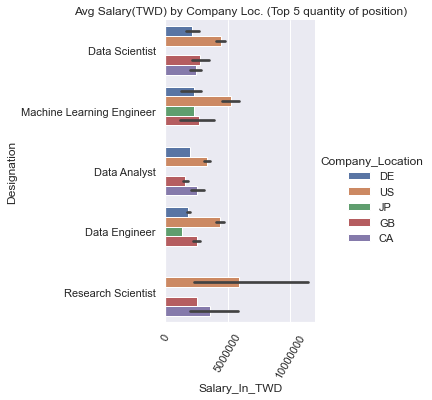

In [174]:
# Top 5 quantity of position + Company_Size + average salary
sns.set_theme(style="darkgrid")
chose_position = df['Designation'].value_counts().sort_values(ascending=False)[:5].sort_values(ascending=False).index.tolist()
df_chose = df[(df['Designation'].isin(chose_position))&(df['Company_Location'].isin(['US','JP','CA','GB','DE']))].reset_index(drop=True)
p = sns.catplot(x='Salary_In_TWD', y='Designation', kind='bar', hue='Company_Location', data=df_chose)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))   # change scientific notation(eg.1e5) to plain(eg.100000)
plt.xticks(rotation = 60)
plt.title('Avg Salary(TWD) by Company Loc. (Top 5 quantity of position)')
plt.show()

* 小結：比較5個國家[US(美國),DE(德國),JP(日本),GB(英國),CA(加拿大)]在此5個position的平均薪資，其中均以USA為最高，德國、加拿大與英國次之，日本由於在此dataset共僅有6筆數據，在此5個position僅有2個position有數據，故僅當參考

### Phase 2. Choose the most 10 average salary positions and analyze them

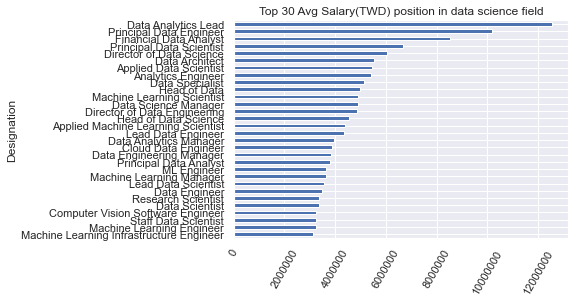

In [175]:
sns.set_theme(style="darkgrid")
ax = df.groupby(['Designation'])['Salary_In_TWD'].mean().sort_values(ascending=False)[:30].sort_values().plot(kind='barh')
plt.title('Top 30 Avg Salary(TWD) position in data science field')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation = 60)
plt.show()

* 小結：雖然在Phase1排除了數量太少的position，但仍可以針對此資料集中實際存在的所有position進行其EDA，可觀察到Top3相較於後面的平均薪資有較大的落差，為包含特例可能性與泛化性，後續取TOP10作為EDA分析探索

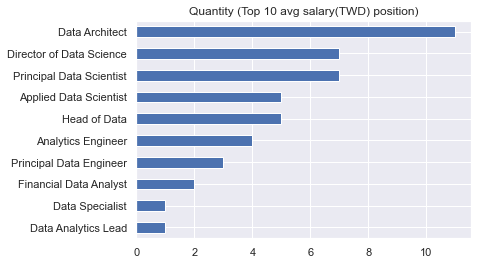

In [176]:
# Top10 avg salary + position quantity
sns.set_theme(style="darkgrid")
chose_position = df.groupby(['Designation'])['Salary_In_TWD'].mean().sort_values(ascending=False)[:10].index.tolist()
df_chose = df[df['Designation'].isin(chose_position)].reset_index(drop=True)
df_chose['Designation'].value_counts().sort_values(ascending=False).sort_values().plot(kind='barh')
plt.title('Quantity (Top 10 avg salary(TWD) position)')
plt.show()

In [180]:
df_chose[df_chose['Designation']=='Data Analytics Lead']

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_In_TWD
38,2022,Data Analytics Lead,SE,FT,3.2e+07,US,US,L,100.0,1.3e+07


In [181]:
df_chose[df_chose['Designation']=='Financial Data Analyst']

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_In_TWD
5,2021,Financial Data Analyst,MI,FT,3.6e+07,US,US,L,100.0,1.4e+07
32,2022,Financial Data Analyst,EN,FT,8.0e+06,US,US,L,50.0,3.1e+06


In [182]:
df_chose[df_chose['Designation']=='Principal Data Engineer']

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_In_TWD
6,2021,Principal Data Engineer,SE,FT,1.6e+07,US,US,M,100.0,6.2e+06
18,2021,Principal Data Engineer,SE,FT,1.5e+07,US,US,L,100.0,5.7e+06
21,2021,Principal Data Engineer,EX,FT,4.8e+07,US,US,L,100.0,1.9e+07


* 小結：
    * 可看到Top3平均薪資中的Data Analytics Lead、Financial Data Analyst與Principal Data Engineer數量分別是1、2、3個，其數量偏低可視為特例。但仍可觀察其rawdata中發現一些特性：
        * 這三個position所處公司國家皆在美國，且幾乎均在大型公司(L)
        * Financial Data Analyst在entry-level的薪資為300M，但到了mid-level則直接到了1400M
        * Data Analytics Lead其名稱應為主管職，但除了經驗(Experience)以外無其他欄位區分出職等
        * 這三個position各自最高一位薪資都超過1300M以上，而其他筆數據的平均薪資則約在600M以下，可以看出此三個position均各自被一筆特例給拉高平均，我們視其為outlier
    * Top10平均薪資的position資料筆數均小於30，在量化分析中容易處於不穩定的狀態

### Phase 3. Compare countries US and other countries average salary level

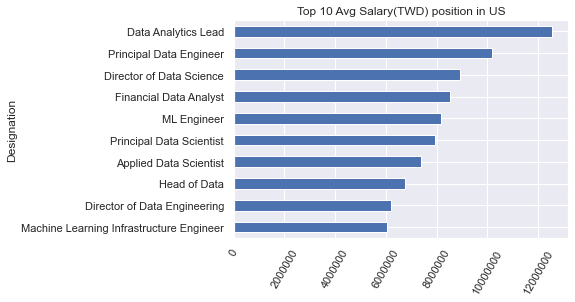

------------------------------


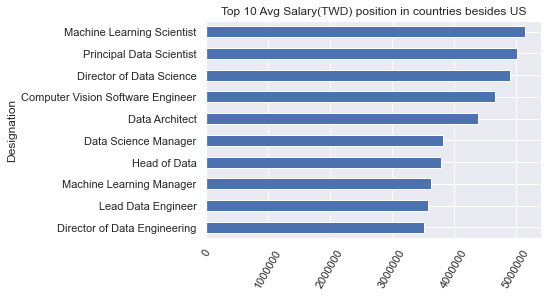

------------------------------


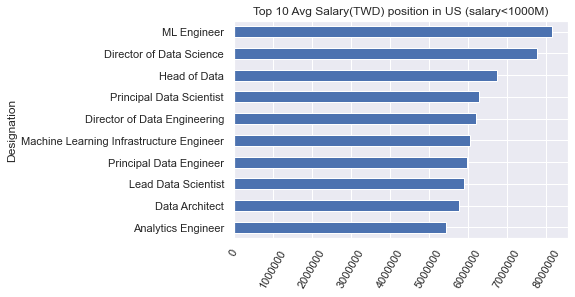

In [6]:
# compare US and other countries Avg Salary
df_us = df[df['Company_Location']=='US'].reset_index(drop=True)
df_oth = df[df['Company_Location']!='US'].reset_index(drop=True)
# add condition: remove Avg Salary >= 1000M
avg_salary_more_1000M_list = df_us[df_us['Salary_In_TWD']>=10000000].index.tolist()
df_rm_more_1000M = df_us.drop(avg_salary_more_1000M_list).reset_index(drop=True)
# visualzation
sns.set_theme(style="darkgrid")
ax = df_us.groupby(['Designation'])['Salary_In_TWD'].mean().sort_values(ascending=False)[:10].sort_values().plot(kind='barh')
plt.title('Top 10 Avg Salary(TWD) position in US')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation = 60)
plt.show()
added_section_separate_line()
ax = df_oth.groupby(['Designation'])['Salary_In_TWD'].mean().sort_values(ascending=False)[:10].sort_values().plot(kind='barh')
plt.title('Top 10 Avg Salary(TWD) position in countries besides US')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation = 60)
plt.show()
added_section_separate_line()
ax = df_rm_more_1000M.groupby(['Designation'])['Salary_In_TWD'].mean().sort_values(ascending=False)[:10].sort_values().plot(kind='barh')
plt.title('Top 10 Avg Salary(TWD) position in US (salary<1000M)')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation = 60)
plt.show()

* 小結：
    * 圖1與圖2分別為美國與其他國家的Top10平均薪資position，可以看出美國在前兩個position(Data Analytics Lead與Principal Data Engineer)均超過1000M，但因為在前面Phase2有分析過這兩個position都各有一筆資料超過1000M而拉高平均薪資，因為我們的目的是想比較美國與其他國家的平均薪資水準，所以我這邊將排除薪資超過1000M的資料
    * 圖3即為圖1排除掉薪資1000M以上的資料，避免掉受高薪所拉高position平均的情況發生。比較圖2與圖3，可以發現即使排除掉我所認定的outlier(>1000M)，美國平均薪資水準仍高於其他國家
    * 觀察圖2與圖3，可以發現Principle Data Scientist平均薪資分別位居第2(圖2)與第4(圖3)，大約在460M~680M之間的水準，是相較於其他position平均薪資最高的，雖然其position quantity皆不多(美國有4筆，在其他國家有3筆)，但考量position與salary假設在高薪層以上有反比的關係，仍具有一定參考性(回過頭來此position也有一筆超過1000M的資料，可視為高薪階層的代表)。

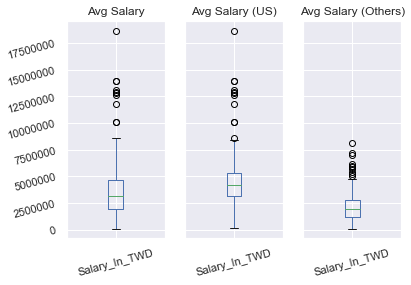

In [6]:
sns.set_theme(style="darkgrid")
# prepare data
df_year = df.copy(deep=True)
df_us = df_year[df_year['Company_Location']=='US'].reset_index(drop=True)
df_oth = df_year[df_year['Company_Location']!='US'].reset_index(drop=True)
# prepare parameters
df_list = list()
df_list.append(df['Salary_In_TWD'])
df_list.append(df_us['Salary_In_TWD'])
df_list.append(df_oth['Salary_In_TWD'])
set_subtitle_list = ['Avg Salary', 'Avg Salary (US)', 'Avg Salary (Others)']
# visualize
visualize_subplots_by_diff_df(df_list, set_subtitle_list, kind='box', nrows=1, ncols=3, sharex=False, sharey=True, rotat_deg=15, scientific_notate=[None, False])

* 小結：
    * 用box-whisker四分位法合鬚圖可觀察到不分國家時的Salary whisker最大值約落在800M~900M，1000M以上則可視為outlier
    * 美國的outlier約出現在900M以上，中位數落在300M~400M；美國以外國家的outlier則在500M以上，中位數約落在200M。比較起來，美國在資料科學領域的position薪資水準大於其他國家100M以上(中位數)，且考慮高薪區(75% ~ Max Whisker)亦大於其他國家至少100M以上

### Phase 4. Compare different years' Salary level

Fig 4-1. Avg Salary groupby Year


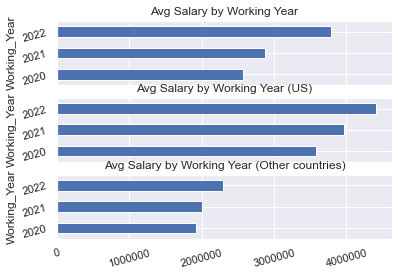

------------------------------
Fig 4-2. Compare Quantity & Total Salary groupby Year


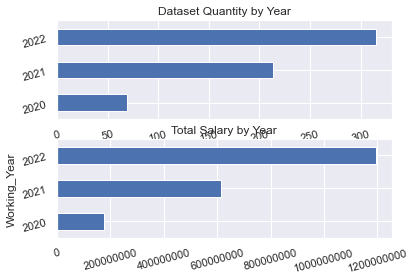

In [5]:
sns.set_theme(style="darkgrid")
## Avg Salary group by Working Year
# prepare dataset
df_year = df.copy(deep=True)
threshold_salary = 10000000
df_year = df_year[df_year['Salary_In_TWD']<threshold_salary].reset_index(drop=True)
df_us = df_year[df_year['Company_Location']=='US'].reset_index(drop=True)
df_oth = df_year[df_year['Company_Location']!='US'].reset_index(drop=True)
# prepare parameters
df_list = list()
df_list.append(df_year.groupby(['Working_Year'])['Salary_In_TWD'].mean())
df_list.append(df_us.groupby(['Working_Year'])['Salary_In_TWD'].mean())
df_list.append(df_oth.groupby(['Working_Year'])['Salary_In_TWD'].mean())
set_subtitle_list = ['Avg Salary by Working Year', 'Avg Salary by Working Year (US)', 'Avg Salary by Working Year (Other countries)']
# visualize
print("Fig 4-1. Avg Salary groupby Year")
visualize_subplots_by_diff_df(df_list, set_subtitle_list, kind='barh', nrows=3, ncols=1, sharex=True, sharey=True, rotat_deg=15, scientific_notate=[False, None])
added_section_separate_line()
## Compare Quantity & Total Salary groupby Year
# prepare parameter
df_list = list()
df_list.append(df_year['Working_Year'].value_counts().sort_values(ascending=True))
df_list.append(df_year.groupby(['Working_Year'])['Salary_In_TWD'].sum())
set_subtitle_list = ['Dataset Quantity by Year', 'Total Salary by Year']
# visualize
print("Fig 4-2. Compare Quantity & Total Salary groupby Year")
visualize_subplots_by_diff_df(df_list, set_subtitle_list, kind='barh', nrows=2, ncols=1, sharex=False, sharey=False, rotat_deg=15, scientific_notate=[False, None])

* 小結：
    * 因為2020年初開始Covid-19，無法比較發生Covid-19前後的差異，僅觀察上圖4-1在2020-2022三年的變化，基本上2022年較前兩年的平均薪資提升的現象
    * 圖4-2為dataset在不同年度的資料數量與其Salary_In_TWD加總比較，可觀察出2022年薪資加總較多，且資料筆數也較多，但依舊無法由資料筆數增加來推得工作數量增加。

Fig 4-3. Top 10 Avg Salary(TWD) position in 2022


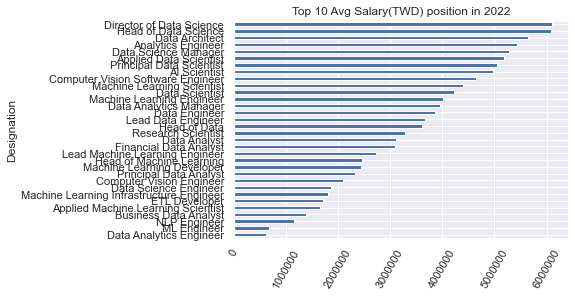

Fig 4-4. Top 10 Avg Salary(TWD) position in 2021


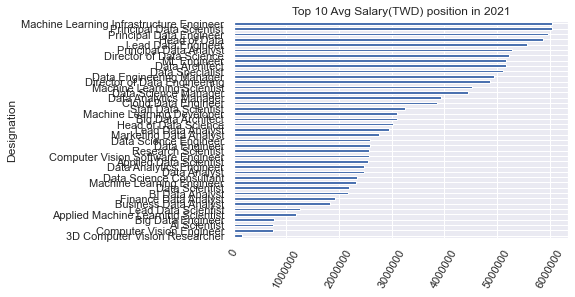

Fig 4-5. Salary box-whisker plot by Year


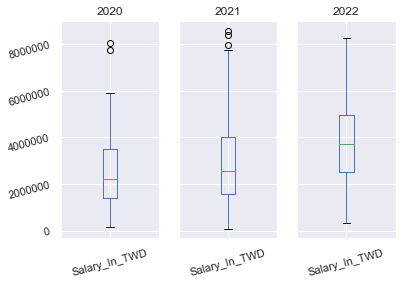

In [6]:
threshold_salary = 10000000
df_2022 = df[df['Working_Year']==2022].reset_index(drop=True)
df_2022 = df_2022[df_2022['Salary_In_TWD']<threshold_salary].reset_index(drop=True)
df_2021 = df[df['Working_Year']==2021].reset_index(drop=True)
df_2021 = df_2021[df_2021['Salary_In_TWD']<threshold_salary].reset_index(drop=True)
sns.set_theme(style="darkgrid")
print("Fig 4-3. Top 10 Avg Salary(TWD) position in 2022")
ax = df_2022.groupby(['Designation'])['Salary_In_TWD'].mean().sort_values(ascending=False)[:].sort_values().plot(kind='barh')
plt.title('Top 10 Avg Salary(TWD) position in 2022')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation = 60)
plt.show()
added_section_separate_line
print("Fig 4-4. Top 10 Avg Salary(TWD) position in 2021")
ax = df_2021.groupby(['Designation'])['Salary_In_TWD'].mean().sort_values(ascending=False)[:].sort_values().plot(kind='barh')
plt.title('Top 10 Avg Salary(TWD) position in 2021')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation = 60)
plt.show()
## box-whisker plot by year
print("Fig 4-5. Salary box-whisker plot by Year")
sns.set_theme(style="darkgrid")
# prepare data
df_year = df.copy(deep=True)
threshold_salary = 10000000
df_2020 = df_year[df_year['Working_Year']==2020].reset_index(drop=True)
df_2020 = df_2020[df_2020['Salary_In_TWD']<threshold_salary].reset_index(drop=True)
df_2021 = df_year[df_year['Working_Year']==2021].reset_index(drop=True)
df_2021 = df_2021[df_2021['Salary_In_TWD']<threshold_salary].reset_index(drop=True)
df_2022 = df_year[df_year['Working_Year']==2022].reset_index(drop=True)
df_2022 = df_2022[df_2022['Salary_In_TWD']<threshold_salary].reset_index(drop=True)
# prepare parameters
df_list = list()
df_list.append(df_2020['Salary_In_TWD'])
df_list.append(df_2021['Salary_In_TWD'])
df_list.append(df_2022['Salary_In_TWD'])
set_subtitle_list = ['2020', '2021', '2022']
# visualize
visualize_subplots_by_diff_df(df_list, set_subtitle_list, kind='box', nrows=1, ncols=3, sharex=False, sharey=True, rotat_deg=15, scientific_notate=[None, False])

* 小結：
    * 觀察圖4-5，排除1000M以上薪資的數據之後，2022年整體(包含中位數)薪資水準皆優於前兩年，中位數提升約100M，可以說2022年在資料科學領域JOB的薪資水準整體提升